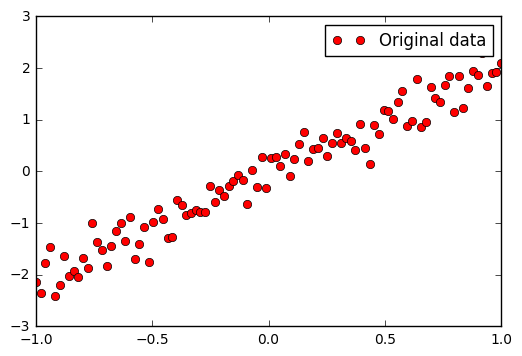

In [11]:
# 实例描述
# 假设有一组数据集，其x和y的对应关系为y≈2x
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
# 生成100个-1到1的点
train_X = np.linspace(-1,1,100)
# np.random.randn(*train_X.shape)等同于np.random.randn(100)
train_Y = 2 * train_X + np.random.randn(*train_X.shape) * 0.3 # y=2x，但是加入了噪声
# 显示模拟数据点
plt.plot(train_X, train_Y, 'ro', label='Original data')
plt.legend()
plt.show()

In [12]:
plotdata =  {'batchsize':[],'loss':[]}
def moving_average(a,w=10):
    if len(a) < w:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

In [13]:
# 重置图
tf.reset_default_graph()

In [14]:
# 创建模型，正向搭建 模型
# 占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')
# 模型参数
W = tf.Variable(tf.random_normal([1],name='weight')) # tf.random_normal从正太分布中取出指定个数的值
b = tf.Variable(tf.zeros([1]),name='bias')
# 前向结构
z = tf.multiply(X,W) + b
# 反向搭建模型
# 反向优化
cost = tf.reduce_mean(tf.square(Y - z))  # tf.reduce_mean取均值
# 学习率
learning_rate = 0.01
# 梯度下降
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# 训练模型
# 初始化所有变量
init = tf.global_variables_initializer()
# 定义参数
training_epochs = 20 # 迭代次数
display_step = 2

In [21]:
# 生成saver
saver =tf.train.Saver()
# 生成模型路径
savedir = 'log/'

Epoch: 1 cost= 0.08502255 W= [1.8997293] b= [0.00895584]
Epoch: 3 cost= 0.07423303 W= [2.0135028] b= [-0.0262336]
Epoch: 5 cost= 0.07323404 W= [2.0438423] b= [-0.03773382]
Epoch: 7 cost= 0.073120296 W= [2.051704] b= [-0.04074824]
Epoch: 9 cost= 0.07310069 W= [2.0537362] b= [-0.04152809]
Epoch: 11 cost= 0.0730963 W= [2.0542603] b= [-0.04172927]
Epoch: 13 cost= 0.07309519 W= [2.054397] b= [-0.04178156]
Epoch: 15 cost= 0.073094904 W= [2.0544322] b= [-0.04179511]
Epoch: 17 cost= 0.073094815 W= [2.0544415] b= [-0.04179873]
Epoch: 19 cost= 0.073094815 W= [2.054444] b= [-0.04179965]
Finished!
cost= 0.07309481 W= [2.0544443] b= [-0.04179975]


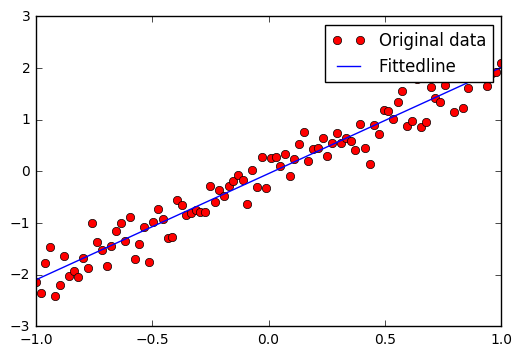

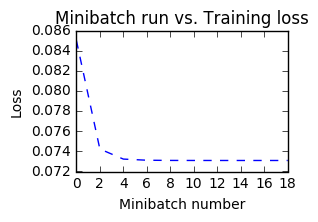

x=0.2, z= [0.36908913]


In [22]:
# 启动session
with tf.Session() as sess:
    sess.run(init)
    # 存放批次值和损失值
    plotdata = {'batchsize':[],'loss':[]}
    # 向模型输入数据
    for epoch in range(training_epochs):
        for (x,y) in zip(train_X, train_Y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:train_X, Y:train_Y})
            print('Epoch:', epoch+1, 'cost=', loss, 'W=', sess.run(W), 'b=', sess.run(b))
            if not (loss == 'NA'):
                plotdata['batchsize'].append(epoch)
                plotdata['loss'].append(loss)
    print('Finished!')
    # 保存模型
    saver.save(sess, savedir+'linermodel.cpkt')
    print('cost=', sess.run(cost, feed_dict={X:train_X, Y:train_Y}), 'W=', sess.run(W), 'b=', sess.run(b))
    
    
    # 训练模型可视化
    # 图形显示
    plt.plot(train_X, train_Y, 'ro', label='Original data')
    plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fittedline')
    plt.legend()
    plt.show()
    
    plotdata['avgloss'] = moving_average(plotdata['loss'])
    plt.figure(1)
    plt.subplot(2,2,1)
    plt.plot()
    plt.plot(plotdata['batchsize'], plotdata['avgloss'], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs. Training loss')
    
    plt.show()
    
    # 使用模型
    print('x=0.2, z=', sess.run(z, feed_dict={X:0.2}))

In [25]:
# 模型的载入
with tf.Session() as sess2:
    sess2.run(tf.global_variables_initializer())
    saver.restore(sess2, savedir+'linermodel.cpkt')
    print('x=0.2, z=', sess2.run(z, feed_dict={X:0.2}))

INFO:tensorflow:Restoring parameters from log/linermodel.cpkt
x=0.2, z= [0.36908913]
